<a href="https://colab.research.google.com/github/Mainak156/Gatekeeper-AI/blob/main/ML_Mini_Project_MUX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


===== 2-to-1 MUX =====

Truth Table (2-to-1 MUX):
   S  D0  D1  Y
0  0   0   0  0
1  0   0   1  0
2  0   1   0  1
3  0   1   1  1
4  1   0   0  0
5  1   0   1  1
6  1   1   0  0
7  1   1   1  1


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


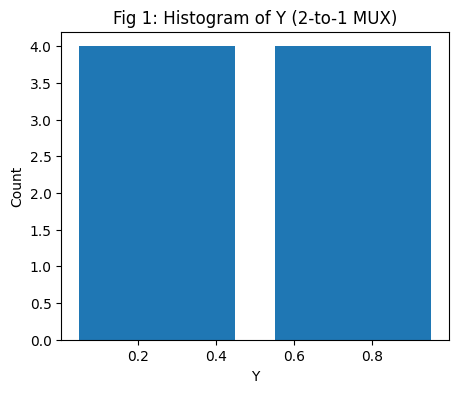

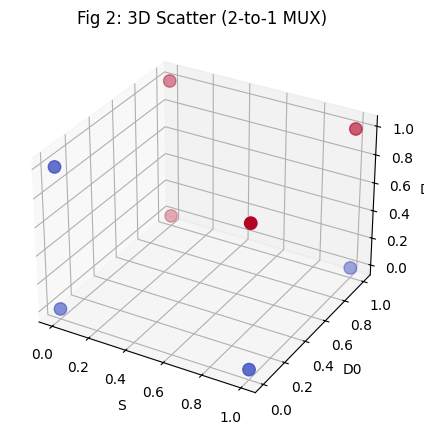

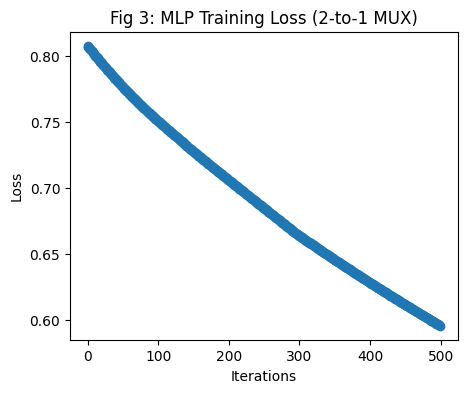

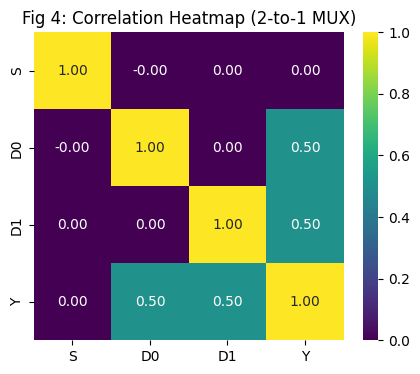


===== 4-to-1 MUX =====

Truth Table (4-to-1 MUX):
    S0  S1  D0  D1  D2  D3  Y
0    0   0   0   0   0   0  0
1    0   0   0   0   0   1  0
2    0   0   0   0   1   0  0
3    0   0   0   0   1   1  0
4    0   0   0   1   0   0  0
5    0   0   0   1   0   1  0
6    0   0   0   1   1   0  0
7    0   0   0   1   1   1  0
8    0   0   1   0   0   0  1
9    0   0   1   0   0   1  1
10   0   0   1   0   1   0  1
11   0   0   1   0   1   1  1
12   0   0   1   1   0   0  1
13   0   0   1   1   0   1  1
14   0   0   1   1   1   0  1
15   0   0   1   1   1   1  1
16   0   1   0   0   0   0  0
17   0   1   0   0   0   1  0
18   0   1   0   0   1   0  1
19   0   1   0   0   1   1  1


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


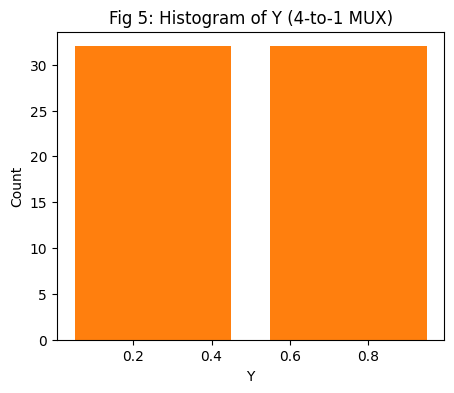

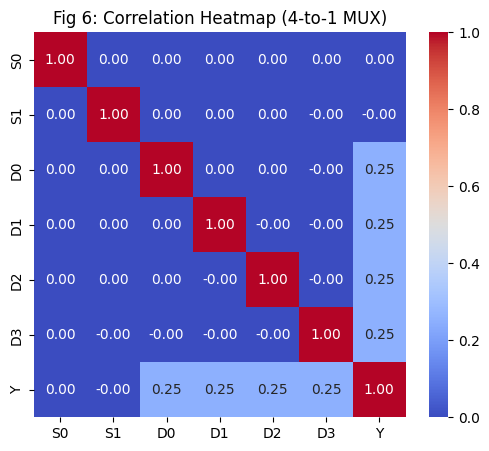

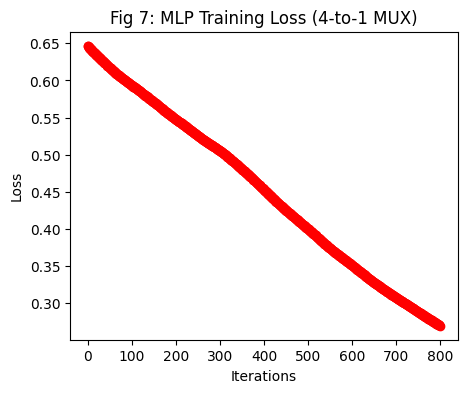

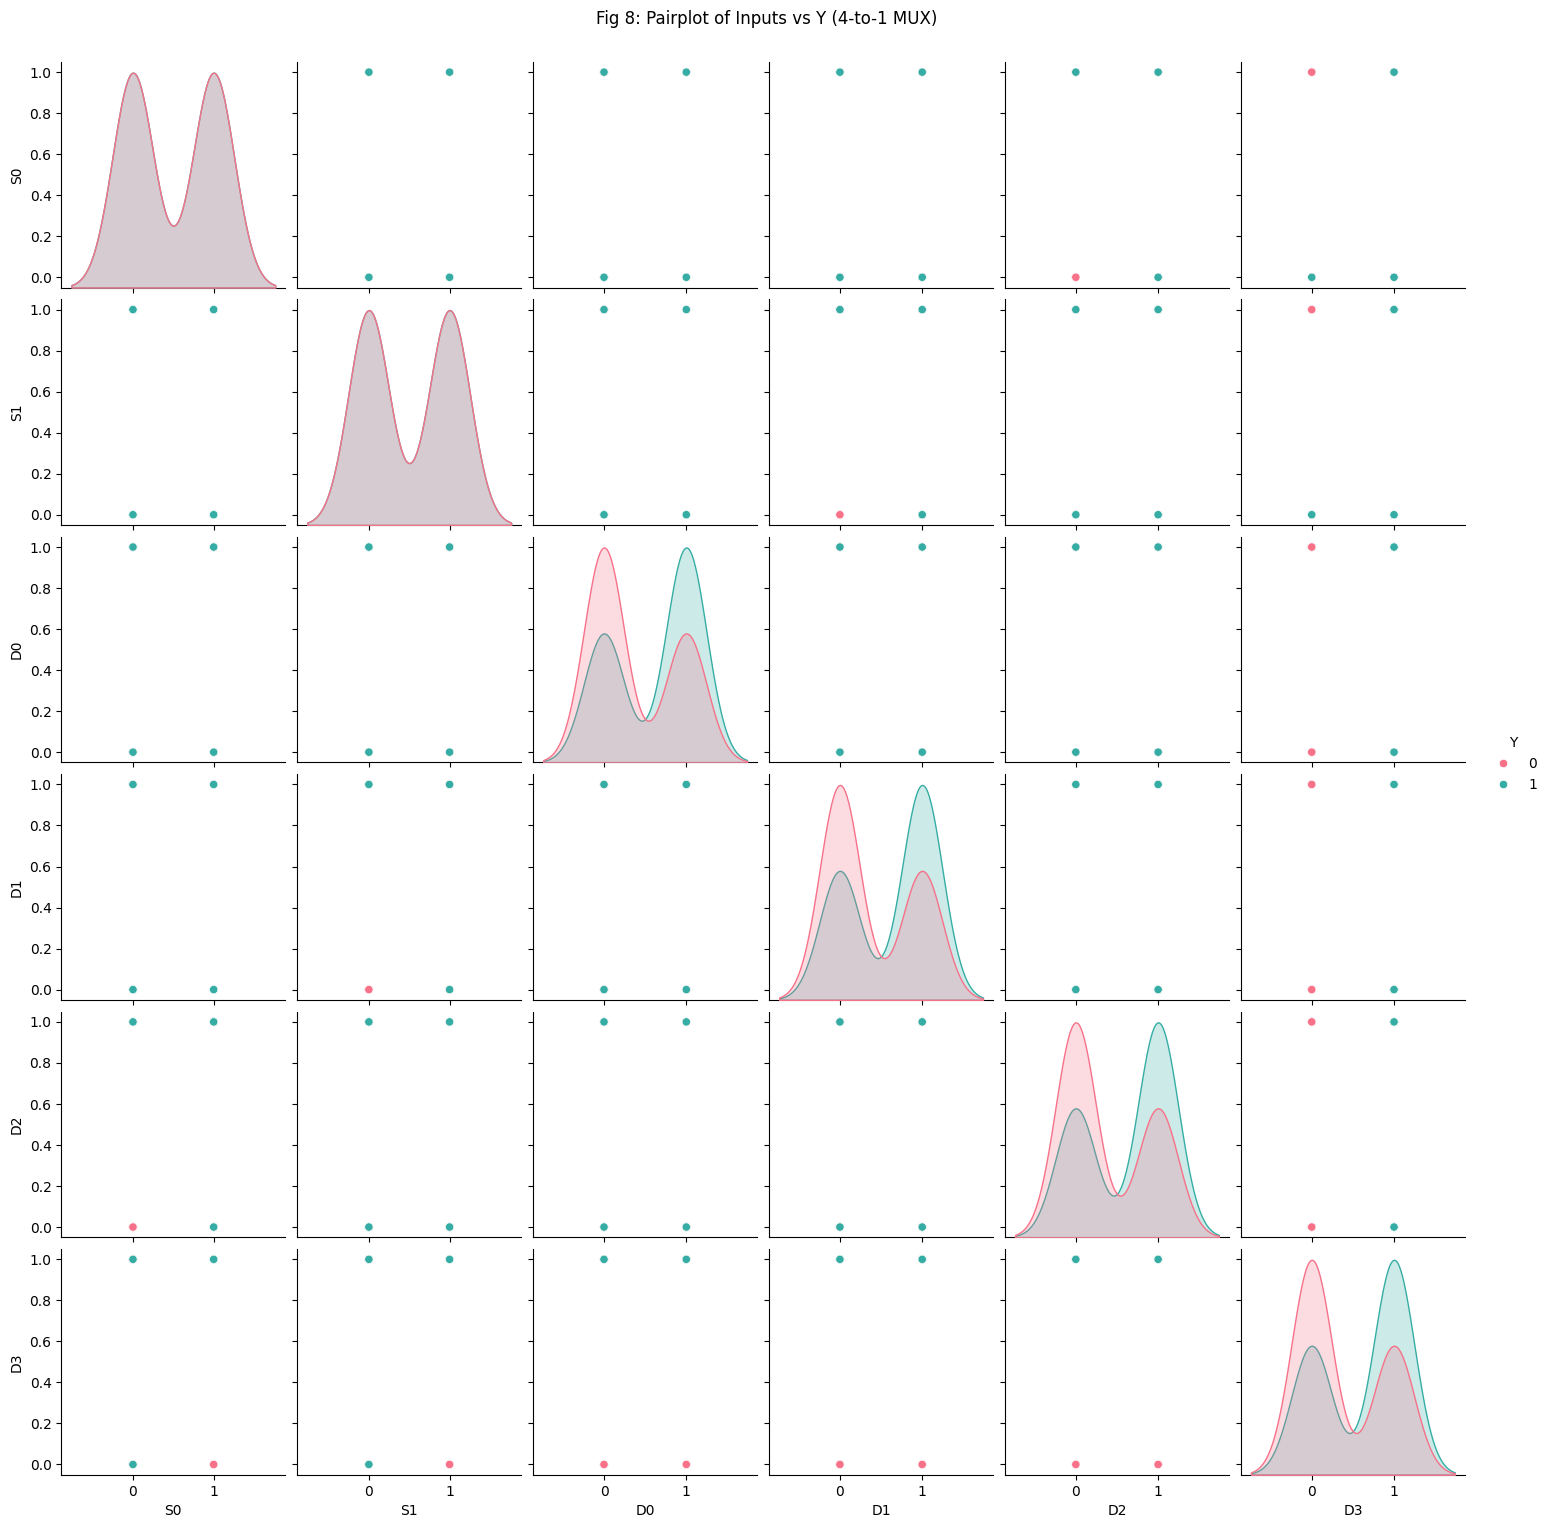

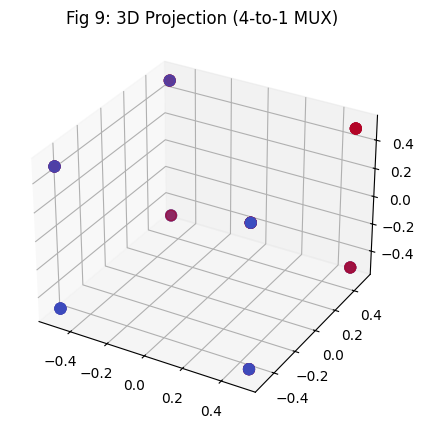

In [1]:
# ================================
# Multiplexer (MUX) Implementation
# ================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neural_network import MLPClassifier

# -------------------------------------------------------
# 1. 2-to-1 MUX
# -------------------------------------------------------
print("\n===== 2-to-1 MUX =====\n")

# Truth table generation
data_2to1 = []
for S in [0, 1]:
    for D0 in [0, 1]:
        for D1 in [0, 1]:
            Y = (not S and D0) or (S and D1)
            data_2to1.append([S, D0, D1, int(Y)])

df_2to1 = pd.DataFrame(data_2to1, columns=["S", "D0", "D1", "Y"])
print("Truth Table (2-to-1 MUX):")
print(df_2to1)

# Features and labels
X2 = df_2to1[["S", "D0", "D1"]].values
y2 = df_2to1["Y"].values

# Train an MLP
model2 = MLPClassifier(hidden_layer_sizes=(5,), max_iter=500, random_state=42)
history2 = model2.fit(X2, y2)

# -------- Visual 1: Histogram of Y --------
plt.figure(figsize=(5,4))
plt.hist(y2, bins=2, color="#1f77b4", rwidth=0.8)
plt.title("Fig 1: Histogram of Y (2-to-1 MUX)")
plt.xlabel("Y")
plt.ylabel("Count")
plt.show()

# -------- Visual 2: 3D scatter --------
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X2[:,0], X2[:,1], X2[:,2], c=y2, cmap="coolwarm", s=80)
ax.set_xlabel("S")
ax.set_ylabel("D0")
ax.set_zlabel("D1")
ax.set_title("Fig 2: 3D Scatter (2-to-1 MUX)")
plt.show()

# -------- Visual 3: Loss Curve --------
plt.figure(figsize=(5,4))
plt.plot(model2.loss_curve_, marker="o")
plt.title("Fig 3: MLP Training Loss (2-to-1 MUX)")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

# -------- Visual 4: Heatmap --------
plt.figure(figsize=(5,4))
sns.heatmap(df_2to1.corr(), annot=True, cmap="viridis", fmt=".2f")
plt.title("Fig 4: Correlation Heatmap (2-to-1 MUX)")
plt.show()


# -------------------------------------------------------
# 2. 4-to-1 MUX
# -------------------------------------------------------
print("\n===== 4-to-1 MUX =====\n")

# Truth table generation
data_4to1 = []
for S0 in [0,1]:
    for S1 in [0,1]:
        for D0 in [0,1]:
            for D1 in [0,1]:
                for D2 in [0,1]:
                    for D3 in [0,1]:
                        # Equation for 4-to-1 MUX
                        Y = (D0 and (not S1) and (not S0)) or \
                            (D1 and (not S1) and S0) or \
                            (D2 and S1 and (not S0)) or \
                            (D3 and S1 and S0)
                        data_4to1.append([S0, S1, D0, D1, D2, D3, int(Y)])

df_4to1 = pd.DataFrame(data_4to1, columns=["S0","S1","D0","D1","D2","D3","Y"])
print("Truth Table (4-to-1 MUX):")
print(df_4to1.head(20))  # print a sample

# Features and labels
X4 = df_4to1[["S0","S1","D0","D1","D2","D3"]].values
y4 = df_4to1["Y"].values

# Train an MLP
model4 = MLPClassifier(hidden_layer_sizes=(10,), max_iter=800, random_state=42)
history4 = model4.fit(X4, y4)

# -------- Visual 1: Histogram of Y --------
plt.figure(figsize=(5,4))
plt.hist(y4, bins=2, color="#ff7f0e", rwidth=0.8)
plt.title("Fig 5: Histogram of Y (4-to-1 MUX)")
plt.xlabel("Y")
plt.ylabel("Count")
plt.show()

# -------- Visual 2: Correlation Heatmap --------
plt.figure(figsize=(6,5))
sns.heatmap(df_4to1.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Fig 6: Correlation Heatmap (4-to-1 MUX)")
plt.show()

# -------- Visual 3: Loss Curve --------
plt.figure(figsize=(5,4))
plt.plot(model4.loss_curve_, marker="o", color="red")
plt.title("Fig 7: MLP Training Loss (4-to-1 MUX)")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

# -------- Visual 4: Pairplot (Inputs vs Y) --------
sns.pairplot(df_4to1[["S0","S1","D0","D1","D2","D3","Y"]], hue="Y", palette="husl")
plt.suptitle("Fig 8: Pairplot of Inputs vs Y (4-to-1 MUX)", y=1.02)
plt.show()

# -------- Visual 5: 3D Projection --------
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X4_proj = pca.fit_transform(X4)
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X4_proj[:,0], X4_proj[:,1], X4_proj[:,2], c=y4, cmap="coolwarm", s=60)
ax.set_title("Fig 9: 3D Projection (4-to-1 MUX)")
plt.show()
